# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [28]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [29]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [42]:
url = f'http://api.openweathermap.org/data/2.5/weather?q=butaritari&appid={weather_api_key}&units=imperial'
res = requests.get(url).json()
res['main']['temp_max']


81.09

In [43]:
count = 0
num_set = 1
weathers = []
for city in cities:
    url = f'http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=imperial'
    try:
        res = requests.get(url).json()
        print(f'Processing Record {count%50+1} of Set {num_set} | {city}')
        count = count + 1
        num_set = int(count/50) + 1
        res['main']
        weathers.append(res)
    except:
        print('City not found. Skipping..')

Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | georgetown
Processing Record 3 of Set 1 | itarema
Processing Record 4 of Set 1 | qaanaaq
Processing Record 5 of Set 1 | touros
Processing Record 6 of Set 1 | cherskiy
Processing Record 7 of Set 1 | severo-kurilsk
Processing Record 8 of Set 1 | carnarvon
Processing Record 9 of Set 1 | grindavik
Processing Record 10 of Set 1 | yamada
Processing Record 11 of Set 1 | viedma
Processing Record 12 of Set 1 | kiunga
Processing Record 13 of Set 1 | botro
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | neuquen
Processing Record 16 of Set 1 | bredasdorp
Processing Record 17 of Set 1 | bluff
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | tilichiki
Processing Record 20 of Set 1 | malindi
Processing Record 21 of Set 1 | iquique
Processing Record 22 of Set 1 | sao filipe
Processing Record 23 of Set 1 | fort saint james
Processing Record 24 of Set 1 | rosarito
Processing Record 25 of S

In [44]:
temps = []
humidities = []
cloudiness = []
wind_speeds = []
dates = []
new_cities = []
lats = []
lngs = []
for weather in weathers:
    temps.append(weather['main']['temp_max'])
    humidities.append(weather['main']['humidity'])
    cloudiness.append(weather['clouds']['all'])
    wind_speeds.append(weather['wind']['speed'])
    dates.append(weather['dt'])
    new_cities.append(weather['name'])
    lats.append(weather['coord']['lat'])
    lngs.append(weather['coord']['lon'])

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [45]:
city_data = pd.DataFrame({'City':new_cities,'Lat': lats, 'Lngs': lngs, 'Max Temp': temps, 'Humidity': humidities, 'Cloudiness': cloudiness,
                         'Wind Speed': wind_speeds, 'Date': dates})
city_data.to_csv('output.csv')
city_data.head()

,City,Lat,Lngs,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,Mataura,-46.1927,168.8643,78.85,46,15,4.16,1612671947
1,George Town,5.4112,100.3354,89.60,45,20,6.91,1612671772
2,Itarema,-2.9248,-39.9167,76.89,87,14,8.28,1612672184
3,Qaanaaq,77.4840,-69.3632,12.47,91,100,5.66,1612672039
4,Touros,-5.1989,-35.4608,75.20,88,20,3.44,1612672111


In [46]:
city_data.describe()

,Lat,Lngs,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,5.670000e+02
mean,20.360588,13.842360,50.386384,73.566138,49.629630,8.478660,1.612672e+09
std,32.732274,91.504472,31.933073,18.831279,39.602446,6.147672,2.169315e+02
min,-54.800000,-175.200000,-43.010000,16.000000,0.000000,0.380000,1.612672e+09
25%,-6.463400,-67.934550,31.675000,64.000000,4.000000,4.060000,1.612672e+09
50%,24.266700,16.133300,60.800000,78.000000,49.000000,6.910000,1.612673e+09
75%,47.733300,96.785000,75.915000,88.000000,90.000000,11.500000,1.612673e+09
max,78.218600,179.316700,95.000000,100.000000,100.000000,39.120000,1.612673e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [50]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data[city_data['Humidity'] < 100]

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

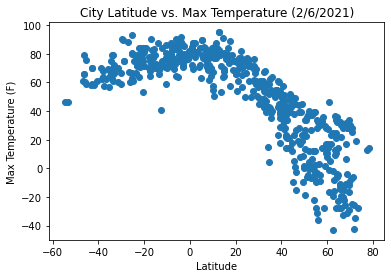

In [51]:
plt.scatter(clean_city_data['Lat'],clean_city_data['Max Temp'])
plt.title('City Latitude vs. Max Temperature (2/6/2021)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.show()
#The code is analyzing how the temperature changes based on the latitude of the given city

## Latitude vs. Humidity Plot

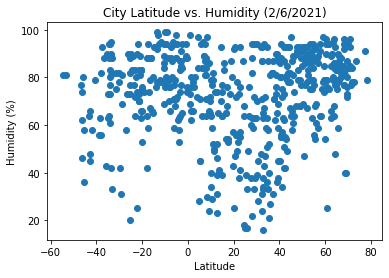

In [55]:
plt.scatter(clean_city_data['Lat'],clean_city_data['Humidity'])
plt.title('City Latitude vs. Humidity (2/6/2021)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()
#The code is analyzing how the humidity changes based on the latitude of the given city(excluding any cities with 100% humidity)

## Latitude vs. Cloudiness Plot

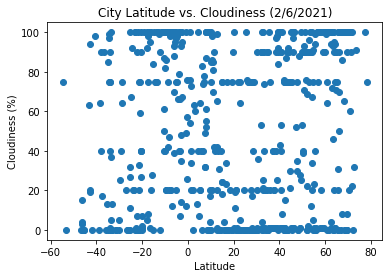

In [57]:
plt.scatter(clean_city_data['Lat'],clean_city_data['Cloudiness'])
plt.title('City Latitude vs. Cloudiness (2/6/2021)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()
#The code is analyzing how the cloudiness changes based on the latitude of the given city

## Latitude vs. Wind Speed Plot

<function matplotlib.pyplot.show(*args, **kw)>

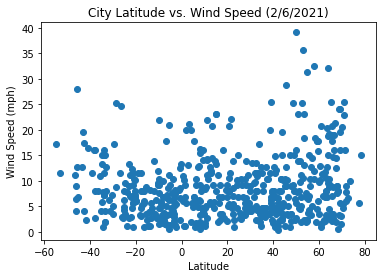

In [58]:
plt.scatter(clean_city_data['Lat'],clean_city_data['Wind Speed'])
plt.title('City Latitude vs. Wind Speed (2/6/2021)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show
#The code is analyzing how the wind speed changes based on the latitude of the given city

## Linear Regression

In [61]:
northern_df = clean_city_data[clean_city_data['Lat']>=0]
southern_df = clean_city_data[clean_city_data['Lat']<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The regression line is y =-1.4x + 93.29 and the r value is -0.86


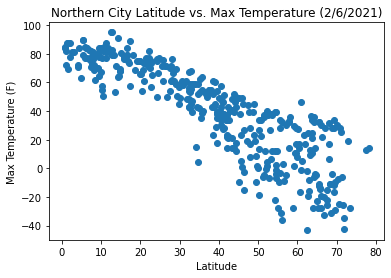

In [102]:
plt.scatter(northern_df['Lat'],northern_df['Max Temp'])
plt.title('Northern City Latitude vs. Max Temperature (2/6/2021)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig('Northern_Hemisphere_Max_Temp_v_Latitude.png')
#Regression
reg = linregress(northern_df['Lat'],northern_df['Max Temp'])
slope = reg[0]
print(f'The regression line is y ={round(reg[0],2)}x + {round(reg[1],2)} and the r value is {round(reg[2],2)}')
#Analysis
#The code is analyzing how the temperature changes based on the latitude of the given city in the northern hemisphere.
#The R value is negative becuase the temperature decreases as latitude increases, and we can see there is a strong
#correlation as shown by the r value of 0.86

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The regression line is y =0.38x + 81.46 and the r value is 0.53


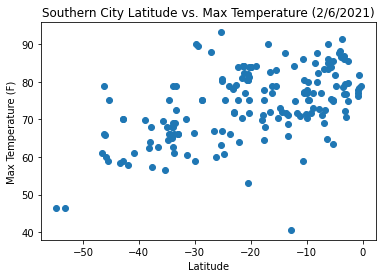

In [96]:
plt.scatter(southern_df['Lat'],southern_df['Max Temp'])
plt.title('Southern City Latitude vs. Max Temperature (2/6/2021)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig('Southern_Hemisphere_Max_Temp_v_Latitude.png')
#Regression
reg = linregress(southern_df['Lat'],southern_df['Max Temp'])
slope = reg[0]
print(f'The regression line is y ={round(reg[0],2)}x + {round(reg[1],2)} and the r value is {round(reg[2],2)}')
#Analysis
#This is analyzing how the temperature changes as the latitude changes in the southern hemisphere
#There is a moderate positive correlation between the southern latitudes and temperature as shown as the .53 r value

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The regression line is y =0.29x + 59.7 and the r value is 0.31


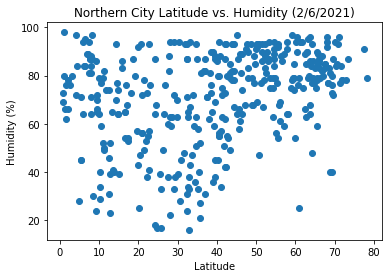

In [95]:
plt.scatter(northern_df['Lat'],northern_df['Humidity'])
plt.title('Northern City Latitude vs. Humidity (2/6/2021)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('Northern_Hemisphere_Humidity_v_Latitude.png')
#Regression
reg = linregress(northern_df['Lat'],northern_df['Humidity'])
slope = reg[0]
print(f'The regression line is y ={round(reg[0],2)}x + {round(reg[1],2)} and the r value is {round(reg[2],2)}')
#Analysis
#This is analyzing how the humidity changes as the latitude changes in the northern hemisphere
#There is a low positive correlation between the northern latitudes and humidity as shown as the .31 r value

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The regression line is y =0.36x + 83.39 and the r value is 0.31


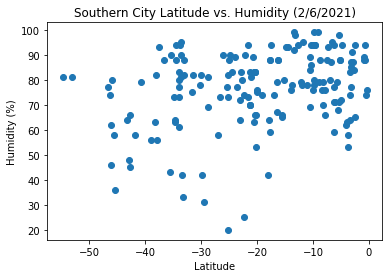

In [97]:
plt.scatter(southern_df['Lat'],southern_df['Humidity'])
plt.title('Southern City Latitude vs. Humidity (2/6/2021)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('Southern_Hemisphere_Humidity_v_Latitude.png')
#Regression
reg = linregress(southern_df['Lat'],southern_df['Humidity'])
slope = reg[0]
print(f'The regression line is y ={round(reg[0],2)}x + {round(reg[1],2)} and the r value is {round(reg[2],2)}')
#Analysis
#This is analyzing how the humidity changes as the latitude changes in the southern hemisphere
#There is a low positive correlation between the southern latitudes and humidity as shown as the .31 r value
#This has the same r value as in the northern hemisphere which shows that the humidity seems to increase the same amount
#whether or not the city is in the northern or southern hemisphere

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The regression line is y =0.36x + 33.31 and the r value is 0.18


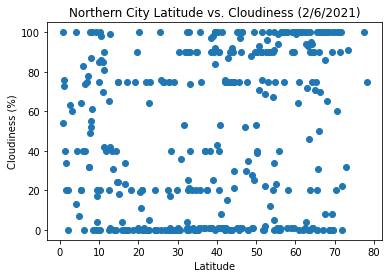

In [98]:
plt.scatter(northern_df['Lat'],northern_df['Cloudiness'])
plt.title('Northern City Latitude vs. Cloudiness (2/6/2021)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('Northern_Hemisphere_Cloudiness_v_Latitude.png')
#Regression
reg = linregress(northern_df['Lat'],northern_df['Cloudiness'])
slope = reg[0]
print(f'The regression line is y ={round(reg[0],2)}x + {round(reg[1],2)} and the r value is {round(reg[2],2)}')
#Analysis
#This is analyzing how the cloudiness changes as the latitude changes in the northern hemisphere
#There is no correlation between the northern latitudes and cloudiness as shown as the very low r value of .18

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The regression line is y =1.11x + 74.59 and the r value is 0.37


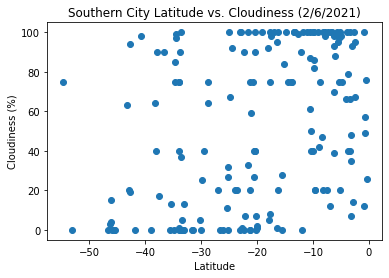

In [99]:
plt.scatter(southern_df['Lat'],southern_df['Cloudiness'])
plt.title('Southern City Latitude vs. Cloudiness (2/6/2021)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('Southern_Hemisphere_Cloudiness_v_Latitude.png')
#Regression
reg = linregress(southern_df['Lat'],southern_df['Cloudiness'])
slope = reg[0]
print(f'The regression line is y ={round(reg[0],2)}x + {round(reg[1],2)} and the r value is {round(reg[2],2)}')
#Analysis
#This is analyzing how the cloudiness changes as the latitude changes in the southern hemisphere
#There is a very weak positive correlation between the southern latitudes and cloudiness as shown as the very low r value of .37

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The regression line is y =0.05x + 7.15 and the r value is 0.15


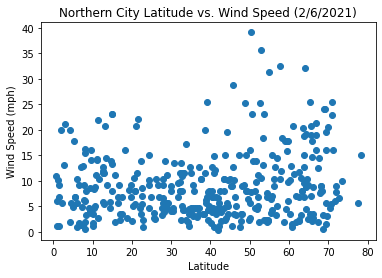

In [100]:
plt.scatter(northern_df['Lat'],northern_df['Wind Speed'])
plt.title('Northern City Latitude vs. Wind Speed (2/6/2021)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig('Northern_Hemisphere_Wind_Speed_v_Latitude.png')
#Regression
reg = linregress(northern_df['Lat'],northern_df['Wind Speed'])
slope = reg[0]
print(f'The regression line is y ={round(reg[0],2)}x + {round(reg[1],2)} and the r value is {round(reg[2],2)}')
#Analysis
#This is analyzing how the wind speed changes as the latitude changes in the northern hemisphere
#There is no correlation between the northern latitudes and wind speed as shown as the very low r value of .15

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The regression line is y =-0.13x + 5.05 and the r value is -0.33


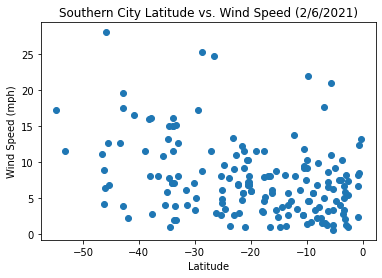

In [101]:
plt.scatter(southern_df['Lat'],southern_df['Wind Speed'])
plt.title('Southern City Latitude vs. Wind Speed (2/6/2021)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig('Southern_Hemisphere_Wind_Speed_v_Latitude.png')
#Regression
reg = linregress(southern_df['Lat'],southern_df['Wind Speed'])
slope = reg[0]
print(f'The regression line is y ={round(reg[0],2)}x + {round(reg[1],2)} and the r value is {round(reg[2],2)}')
#Analysis
#This is analyzing how the wind speed changes as the latitude changes in the southern hemisphere
#There is a weak negative correlation between the southern latitudes and wind speed as shown as the low r value of -0.33